# Übung 6

### Themen: Modellvalidierung und Hyperparameter-Optimierung


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import graphviz

## Aufgabe 1

In dieser Aufgaben werden Sie ein multivariates Lineares Regressionsmodell herleiten und dessen Güte mit dem Bestimmtheitsmaß bewerten. Dazu werde im weiteren Verlauf der folgende Datensatz betrachtet, der Angaben zu historischen Immobilienverkäufen enthält. Die Zielvariable ist die Spalte `Y house price of unit area`, die den (normierten) Hauspreis angibt.

#### Einlesen des Datensatzes

In [2]:
df = pd.read_csv('realestate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df['X1 transaction date']

0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: X1 transaction date, Length: 414, dtype: float64

#### a) Lineare Regression

Führen Sie einen Train-Test-Split durch mit `test_size=0.2` durch und erstellen Sie ein Lineares Regressionsmodell in Scikit-learn zur Vorhersage der Zielvariablen `Y house price of unit area`. Werten Sie das Bestimmtheitsmaß $R^2$ auf dem Trainings- und auf dem Testdatensatz aus und beurteilen Sie die Güte des Modells. Wiederholen Sie die Teilaufgabe mehrfach und vergleichen Sie die Ergebnisse. <br><br>
Hinweis: das Bestimmtheitsmaß kann man durch den Aufruf der Methode `score` der Klasse `sklearn.linear_model.LinearRegression` erhalten.

In [5]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [6]:
X_train

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
380,14.1,289.32480,5
41,16.8,4066.58700,0
217,28.0,372.62420,6
70,6.6,90.45606,9
87,16.9,4066.58700,0
...,...,...,...
311,21.3,537.79710,4
29,7.1,451.24380,5
381,8.0,132.54690,9
295,18.2,2179.59000,3


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Fit a linear regression model on the training data
reg = LinearRegression().fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Make predictions on the test data
y_pred = reg.predict(X_test)

# Print the mean squared error and R-squared score of the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('score train:', reg.score(X_train, y_train))
print('score test:', reg.score(X_test, y_test))

Mean squared error: 69.20436676263425
score train: 0.5334246433423124
score test: 0.551511819685309


#### b) Residual-Plot

Zeichnen Sie einen Residual-Plot für das oben entwickelte Regressionsmodell. Verwenden Sie dazu die Funktion `matplotlib.pyplot.scatter`.

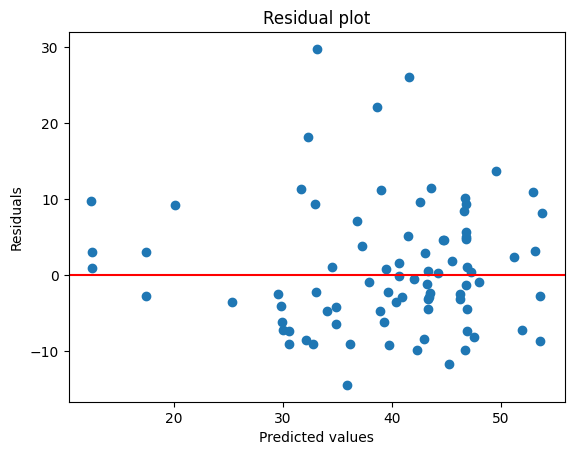

In [8]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

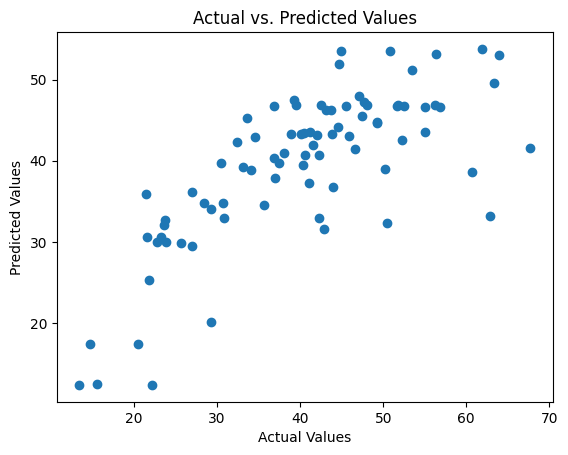

In [9]:
# Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

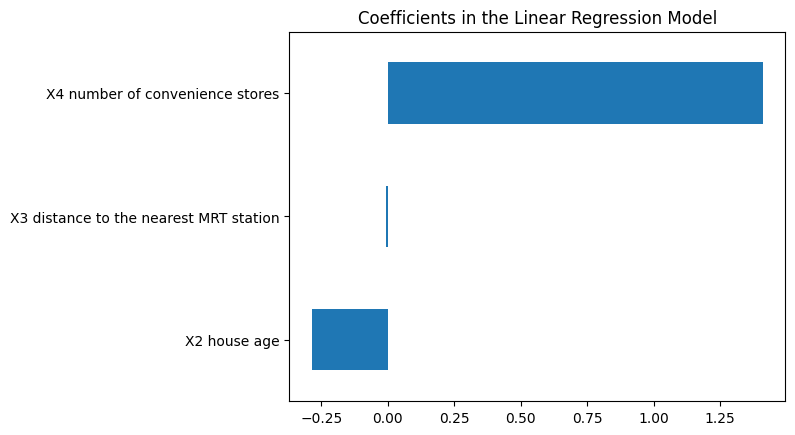

In [10]:
# Coefficient plot
coef = pd.Series(reg.coef_, index=X.columns)
coef.plot(kind='barh')
plt.title('Coefficients in the Linear Regression Model')
plt.show()

## Aufgabe 2:  k-fache Cross Validation

Anstatt wie in Aufgabe 1 einen einzigen (fixen) Train-Test-Split auszuführen und darauf das Modell zu trainieren und zu bewerten, soll nun k-fache Kreuzvalidierung (vgl. Vorlesung) durchgeführt werden, um eine zuverlässigere Einschätzung der Modellgüte zu erhalten. Führen Sie unter Verwendung von `sklearn.model_selection.KFold` (vgl. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html">Dokumentation</a>) eine fünffache Kreuzvalidierung des Linearen Regressionsmodells aus Aufgabe 1 durch. Bestimmen Sie für jeden Fold das Bestimmtheitsmaß jeweils auf dem Trainings- und auf dem Testdatensatz und berechnen Sie anschließend deren Mittelwerte. Vergleichen Sie diese mit denen entsprechenden Werten aus Aufgabe 1.

In [11]:
from sklearn.model_selection import KFold

In [12]:
# Define the number of folds for K-fold cross-validation
num_folds = 5

# Create the K-fold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the test set predictions for each fold
test_preds = []
test_scores = []
train_scores = []

# Loop over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the linear regression model on the training data
    reg = LinearRegression().fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = reg.predict(X_test_scaled)
    
    # Store the test set predictions for this fold
    # Store the scores for train and test data
    test_preds.append(y_pred)
    test_scores.append(reg.score(X_test_scaled, y_test))
    train_scores.append(reg.score(X_train_scaled, y_train))
    

# Compute the overall test set predictions by averaging the predictions across all folds
print(test_scores)
print(train_scores)



Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
[0.6489726933106557, 0.42441859849679486, 0.5897524283809032, 0.5582600991539899, 0.4394475344467905]
[0.5146436173066766, 0.5593123783117578, 0.527636215929614, 0.5351964404536014, 0.5741783650968845]


In [13]:
test_scores_mean = np.mean(test_scores, axis=0)
train_scores_mean = np.mean(train_scores, axis=0)
print("Train Scores Mean: ",train_scores_mean)
print("Test Scores Mean: ",test_scores_mean)

Train Scores Mean:  0.5421934034197069
Test Scores Mean:  0.5321702707578269


## Aufgabe 3: Hyperparameteroptimierung durch Rastersuche mit k-facher Kreuzvalidierung

#### a) Funktionsweise von Entscheidungsbaum-Regression

Lesen Sie die Seiten 346-347 (Kapitel 10.8.1) im Buch von Raschka zum Thema Entscheidungsbaum-Regression. Beantworten Sie die folgenden Fragen:
* Welchen Unterschied gibt es zur Entscheidungsbaum-Klassifikation hinsichtlich des Maßes für die Unreinheit?
* Wie wird nach Aufbau des Baums für ein neues Sample ein Prognosewert bestimmt?
* Nennen und erläutern Sie zwei wesentliche Unterschiede eines DecisionTreeRegressors zu einem Linearen Regressionsmodell der Form $y=\theta_0+\theta_1x_1+\ldots+\theta_px_p$.

Modellform:
Ein DecisionTreeRegressor-Modell erstellt Entscheidungsbäume, um die Vorhersage zu treffen, während ein Lineares Regressionsmodell eine lineare Funktion verwendet, um die Beziehung zwischen den Features und dem Zielwert zu modellieren.

Modellkomplexität:
Ein DecisionTreeRegressor kann im Allgemeinen komplexere Zusammenhänge zwischen den Features und dem Zielwert modellieren als ein Lineares Regressionsmodell. Dies liegt daran, dass Decision Trees ein höheres Maß an Flexibilität haben und die Daten auf eine nicht-lineare Weise partitionieren können. Dies kann jedoch auch dazu führen, dass Entscheidungsbäume zu Overfitting neigen, insbesondere wenn sie tief sind und eine große Anzahl von Splits enthalten. Im Gegensatz dazu ist ein Lineares Regressionsmodell in der Regel einfacher und weniger anfällig für Overfitting, insbesondere wenn die Anzahl der Features im Vergleich zur Anzahl der Trainingsdaten groß ist.

Der wesentliche Unterschied zwischen der Entscheidungsbaum-Klassifikation und der Entscheidungsbaum-Regression besteht in der Wahl des Maßes für die Unreinheit.

Für die Entscheidungsbaum-Klassifikation wird in der Regel das Maß für die Unreinheit der Gini-Index oder die Entropie verwendet, um die Qualität der Aufteilung der Daten in den Knoten des Baums zu bewerten. Der Gini-Index misst, wie oft ein zufällig ausgewähltes Element falsch klassifiziert würde, wenn es zufällig in den Subgruppen platziert würde, während die Entropie die Unordnung der Daten in einem Knoten misst.

Für die Entscheidungsbaum-Regression wird stattdessen der mittlere absolute Fehler (MAE) oder die mittlere quadratische Abweichung (MSE) verwendet, um die Qualität der Aufteilung der Daten in den Knoten des Baums zu bewerten. Der MAE misst den durchschnittlichen Betrag der Abweichung zwischen den Vorhersagen und den tatsächlichen Werten, während der MSE den durchschnittlichen quadratischen Abstand zwischen den Vorhersagen und den tatsächlichen Werten misst.

Der Grund für diese Unterschiede liegt in den unterschiedlichen Zielen der Klassifikation und Regression. Während die Klassifikation das Ziel hat, die Daten in diskrete Klassen zu unterteilen, hat die Regression das Ziel, die kontinuierlichen Werte der Zielvariable zu schätzen. Daher sind unterschiedliche Maße für die Unreinheit erforderlich, um die Qualität der Aufteilung der Daten in den Knoten des Entscheidungsbaums zu bewerten.

#### b) DecisionTreeRegressor in Scikit-learn

Erstellen Sie auf dem Trainingsdatensatz aus Aufgabe 1 ein baumbasiertes Regressionsmodell unter Verwendung der Klasse `sklearn.tree.DecisionTreeRegressor`. Werten Sie anschließend das Bestimmtheitsmaß auf dem Trainings- und auf dem Testdatensatz aus. Erklären Sie Ihre Beobachtung.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the DecisionTreeRegressor model with some hyperparameters
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=50)

# fit the model to the training data
tree_reg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = tree_reg.predict(X_test)

# evaluate the model performance
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")
print(tree_reg.score(X_test, y_test))

R2 Score: 0.7262696909191924
0.7262696909191924


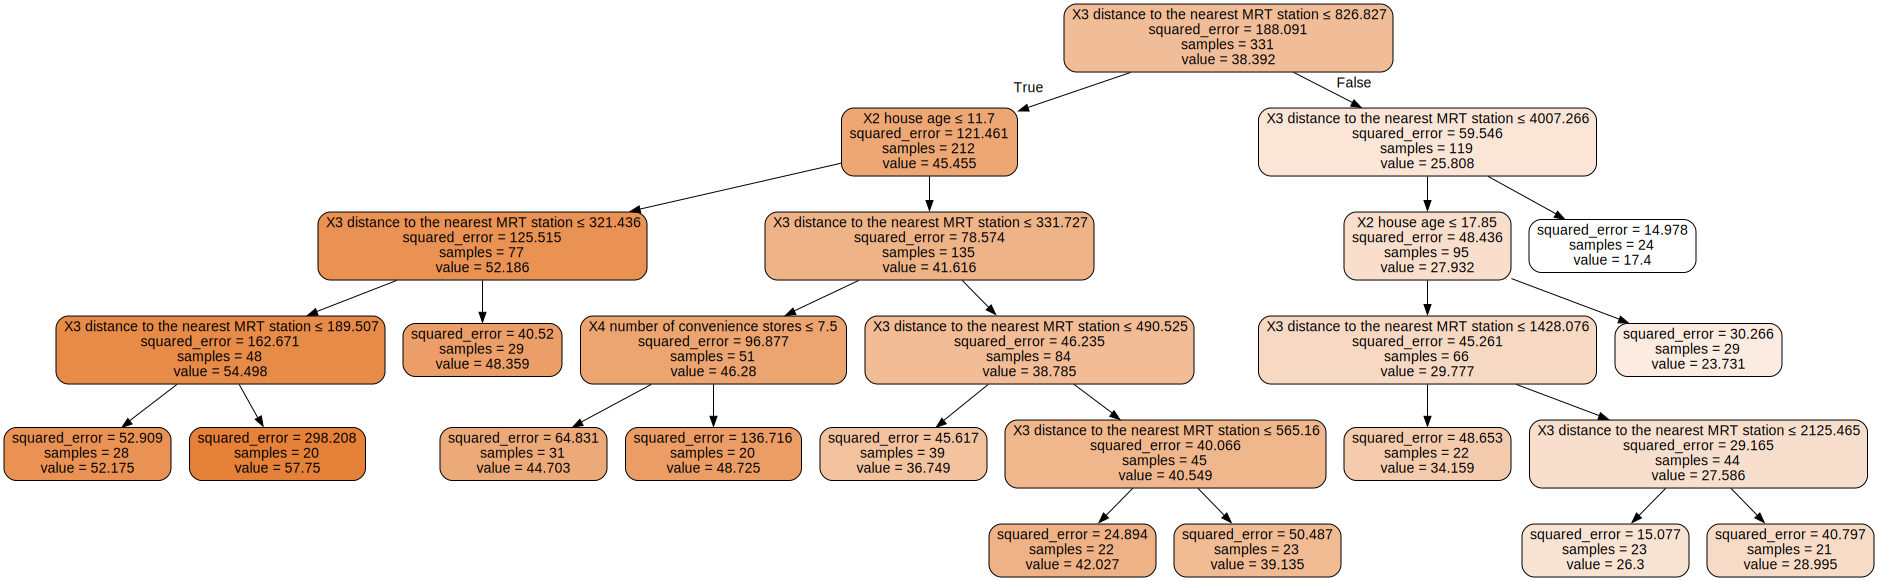

In [16]:
from sklearn.tree import export_graphviz
import graphviz

# export the decision tree to a dot file
dot_data = export_graphviz(tree_reg, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

# create the graph from the dot file
graph = graphviz.Source(dot_data)

# display the graph
graph


The DecisionTreeRegressor works by recursively partitioning the data into subsets based on the values of the independent variables. At each node of the tree, the algorithm selects the variable and the split point that minimize the mean squared error (MSE) of the dependent variable. The MSE is a measure of the variance of the target variable in the subset.

The splitting process continues until the tree reaches a stopping criterion, such as a maximum depth, a minimum number of samples in a leaf node, or a minimum reduction in MSE. Once the tree is built, the dependent variable is predicted by traversing the tree from the root node to a leaf node that corresponds to the test data.

The main advantage of decision trees is their interpretability, as the splitting rules can be easily visualized and understood. However, decision trees are prone to overfitting and can be unstable, as small changes in the data can lead to large changes in the tree structure. To address these issues, ensemble methods such as Random Forest and Gradient Boosting are often used

#### c) Hyperparameter-Optimierung mittels Rastersuche und Kreuzvalidierung

Lesen Sie die <a  href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Dokumentation</a> der Klasse `GridSearchCV` aus dem Modul `sklearn.model_selection`. Verwenden Sie diese anschließend, um die Hyperparameter `max_depth` und `min_samples_leaf` durch Rastersuche (engl. "grid search") zu optimieren. Beschränken Sie sich bei der Rastersuche auf die Daten des Trainingsdatensatzes aus Aufgabe 1. Testen Sie für `max_depth` die Werte aus der Menge $\{1,2,3,4,5\}$ und für 
`min_samples_leaf` die Werte aus der Menge $\{5,10,20,30\}$. Geben Sie für jede mögliche Parameter-Kombination den durch $10$-fache Kreuzvalidierung erhaltenen mittleren $R^2$-Wert aus. Für welche Werte der Hyperparameter ist dieser am größten? <br><br>
Hinweise: die Ergebnisse der GridSearch werden im Attribut `cv_results_` abgelegt. Die optimalen Parameter und das entsprechende Bewertungsmaß (hier: $R^2$) werden in den Attributen `best_params_` und `best_score_` abgelegt. 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Define the parameter grid
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_leaf': [5, 10, 20, 30]}

# Create a decision tree regressor object
dt_reg = DecisionTreeRegressor(random_state=42)

# Create a GridSearchCV object
#cv = cross validate (how often)
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=10, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameter combination
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the R^2 score on the test set
r2 = r2_score(y_test, y_pred)

# Print the best parameter combination and the R^2 score
print("Best parameters:", best_params)
print("R^2 score:", r2)
print("###################################################################################")
###################################################################################
#The best model is done now. We just wanna get some interesting stats here

# Get the mean cross-validated scores for each parameter combination
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Parameters:", params)
    print("Mean R^2 score:", mean_score)



Best parameters: {'max_depth': 5, 'min_samples_leaf': 20}
R^2 score: 0.7262696909191922
###################################################################################
Parameters: {'max_depth': 1, 'min_samples_leaf': 5}
Mean R^2 score: 0.4430087917125558
Parameters: {'max_depth': 1, 'min_samples_leaf': 10}
Mean R^2 score: 0.4430087917125558
Parameters: {'max_depth': 1, 'min_samples_leaf': 20}
Mean R^2 score: 0.4430087917125558
Parameters: {'max_depth': 1, 'min_samples_leaf': 30}
Mean R^2 score: 0.4430087917125558
Parameters: {'max_depth': 2, 'min_samples_leaf': 5}
Mean R^2 score: 0.5475774443743813
Parameters: {'max_depth': 2, 'min_samples_leaf': 10}
Mean R^2 score: 0.5475774443743813
Parameters: {'max_depth': 2, 'min_samples_leaf': 20}
Mean R^2 score: 0.5475390684063143
Parameters: {'max_depth': 2, 'min_samples_leaf': 30}
Mean R^2 score: 0.5380838156595862
Parameters: {'max_depth': 3, 'min_samples_leaf': 5}
Mean R^2 score: 0.6013752474394484
Parameters: {'max_depth': 3, 'min_sampl

If you're wondering why the best score isn't in this list, that's because it's only listing the mean of the kFold attempts for each hyperparameter combination. So one of the train/test splits resulted in that highest score, but the mean obviously doesn't show that.

#### d) Residual-Plot

Zeichnen Sie einen Residual-Plot auf dem Testdatensatz und vergleichen Sie die Ergebnisse mit den Ergebnissen, die Sie für die Lineare Regression erhalten hatten.

In [19]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=42)

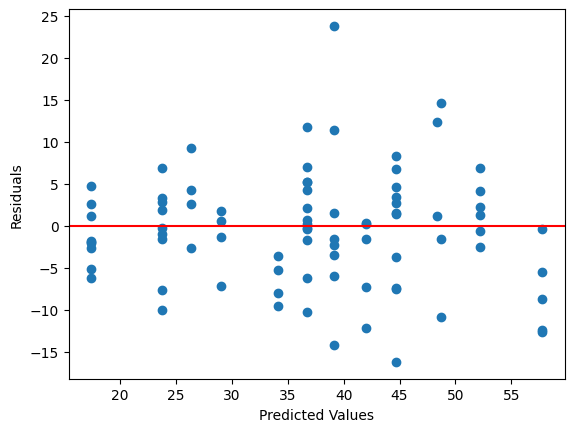

In [20]:
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


## Aufgabe 4 (Nichtlineare Transformation von Input-Features)

#### a) Histogramm

Zeichnen Sie ein Histogramm der Spalte `X3 distance to the nearest MRT station` des DataFrames `df`. Was fällt auf?

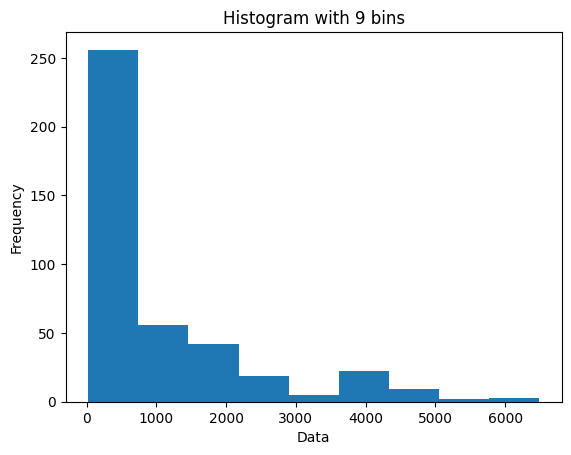

In [21]:
# Calculate the number of bins using Sturges' Rule
num_bins = int(1 + np.log2(len(df['X3 distance to the nearest MRT station'])))

# Plot the histogram with the calculated number of bins
plt.hist(df['X3 distance to the nearest MRT station'], bins=num_bins)

# Add labels and title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with {} bins'.format(num_bins))

# Display the plot
plt.show()

#### b) Transformation der Spalte `X3 distance to the nearest MRT station`.

Transformieren Sie die Spalte `X3 distance to the nearest MRT station` von `df` mit der Funktion $\phi(x)=\log(x+1)$ und zeichen Sie erneut ein Histogramm der transformierten Spalte. Wenden Sie die Transformation anschließend auch auf die oben definierten DataFrames `X_train` und `X_test` an.

In [22]:
for x in range(len(df['X3 distance to the nearest MRT station'])):
    df['X3 distance to the nearest MRT station'][x] = np.log(df['X3 distance to the nearest MRT station'][x]+1)

C:\Users\Carl Küschall\AppData\Local\Temp\ipykernel_30536\1460463542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X3 distance to the nearest MRT station'][x] = np.log(df['X3 distance to the nearest MRT station'][x]+1)


In [23]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply the transformation to the 'X3 distance to the nearest MRT station' column
X_train_scaled[:, 1] = np.log(X_train_scaled[:, 1] + 1)
X_test_scaled[:, 1] = np.log(X_test_scaled[:, 1] + 1)

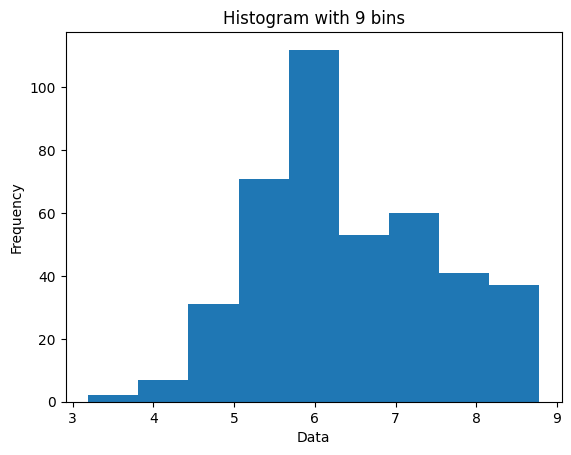

In [24]:
# Calculate the number of bins using Sturges' Rule
num_bins = int(1 + np.log2(len(df['X3 distance to the nearest MRT station'])))

# Plot the histogram with the calculated number of bins
plt.hist(df['X3 distance to the nearest MRT station'], bins=num_bins)

# Add labels and title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with {} bins'.format(num_bins))

# Display the plot
plt.show()

#### c) Modelltraining mit der transformierten Spalte

Trainieren Sie das Lineare Regressionsmodell und den DecisionTreeRegressor aus den Aufgaben 1 und 3 erneut auf dem transformierten Datensatz. Vergleichen Sie anschließend die Bestimmtheitmaße auf den Trainings- und Testdatensätzen mit den Werten, die Sie in Aufgabe 1 und 3 erhalten hatten. Erklären Sie Ihre Beobachtung.

I'm running the GridSearchCV again, so that it utilizes the transformed X_train and X_test. That didn't really change anything, but what I did find, was that because it HAD TO choose a min_samples_leaf, it was limited to WORSE results, than when not taking min_samples_leaf into account. Now that it doesn't, it is able to reach the desired score of 74+ 

In [27]:
# Define the parameter grid
param_grid = {'max_depth': [1, 2, 3, 4, 5]}
#'min_samples_leaf': [5, 10, 20, 30]
# Create a decision tree regressor object
dt_reg = DecisionTreeRegressor(random_state=42)

# Create a GridSearchCV object
#cv = cross validate (how often)
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=10, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter combination
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate the R^2 score on the test set
r2 = r2_score(y_test, y_pred)

# Print the best parameter combination and the R^2 score
print("Best parameters:", best_params)
print("R^2 score:", r2)
print("###################################################################################")
###################################################################################
#The best model is done now. We just wanna get some interesting stats here

# Get the mean cross-validated scores for each parameter combination
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Parameters:", params)
    print("Mean R^2 score:", mean_score)


Best parameters: {'max_depth': 4}
R^2 score: 0.7452362258387062
###################################################################################
Parameters: {'max_depth': 1}
Mean R^2 score: 0.4430087917125558
Parameters: {'max_depth': 2}
Mean R^2 score: 0.5475774443743813
Parameters: {'max_depth': 3}
Mean R^2 score: 0.5889920382748743
Parameters: {'max_depth': 4}
Mean R^2 score: 0.6041466948283991
Parameters: {'max_depth': 5}
Mean R^2 score: 0.5915756214021405


Nach Scaling mit Linearer Regression

In [28]:
# Fit a linear regression model on the training data
reg = LinearRegression().fit(X_train_scaled, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)



# Make predictions on the test data
y_pred = reg.predict(X_test_scaled)

# Print the mean squared error and R-squared score of the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('score train:', reg.score(X_train_scaled, y_train))
print('score test:', reg.score(X_test_scaled, y_test))

Mean squared error: 67.00030951147907
score train: 0.4783858264148817
score test: 0.6006174800570723


Nach Scaling mit RegressionTree

In [29]:
# initialize the DecisionTreeRegressor model with some hyperparameters
tree_reg = DecisionTreeRegressor(max_depth=5 , random_state=42)

# fit the model to the training data
tree_reg.fit(X_train_scaled, y_train)

# make predictions on the testing data
y_pred = tree_reg.predict(X_test_scaled)

# evaluate the model performance
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")

R2 Score: 0.7458303711935472
